## Introduction

The data is provided by the US Census Bureau and has been archived in the University of California, Irvine (UCI) repository. While the data is old, it is still important to see how certain features that contribute to income have changed over the years. This way we can determine whether there has been progress made in bridging the income gap based on these features. We may not necessarily be able to identify the problems causing these gaps in income, but this dataset will help detect where the gaps are so further investigation can be made into these areas. While we do not currently have a recent dataset for relating income to social factors, we believe that the analysis and results from the 1994 dataset could be replicated with a more recent dataset, to provide insight into how certain factors contributing to income have changed over time.

This analysis is performed with the intent of delivering a simple machine learning model that can be used to predict a binary income classification (greater than \$50,000, or less than or equal to $50,000) based on certain factors. We also intend to perform a high-level analysis on all features and the response variable, to find any significant correlations between them. This will help us determine whether income gaps exist based on these features.

The data is provided in two `.csv` files in the following format:

Column | Type | Description/Categories
--- | --- | ---
age | int | self-describing
type_employer | str | the type of employer the individual has (i.e. government, military, private, etc.).
fnlwgt | int | the final sampling weight (i.e. the number of people the census believes that observation represents)
education | str | the highest education attained
education_num | int | a numerical representation of the highest education attained
marital | str | marital status (i.e. married, single, divorced, etc.)
occupation | str | generic field of work
relationship | str | contains family relationship values like husband and father
race | str | self-describing
sex | boolean | sex at birth
capital_gain | int | income received other than salary
capital_loss | int | income lost other than salary
hr_per_week | int | number of hours worked per week
country | str | country of origin of the individual
income | boolean | less than \$50K, or greater than or equal to $50K

We often hear about "gaps" in income based on different factors. Some of these income gaps exist for reasons that are unknown, and many exist for reasons that are known but not enough has been done to address them. This analysis serves to objectively identify whether or not income gaps exist based on the features above. It does not necessarily identify the root cause or problem, but rather identifies where further research should be done. It narrows the scope of future research that may identiy the issues contributing to income gaps.

If income gaps exists, these could be deemed discriminatory and unfair to those that are being discriminated against. Everyone deserves equal opportunity, however, that is not necessarily the case. Identifying that there is a problem is the first step towards correcting it.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/content/adult.csv')

In [3]:
data

age workclass  fnlwgt     education  education.num      marital.status  \
0       90         ?   77053       HS-grad              9             Widowed   
1       82   Private  132870       HS-grad              9             Widowed   
2       66         ?  186061  Some-college             10             Widowed   
3       54   Private  140359       7th-8th              4            Divorced   
4       41   Private  264663  Some-college             10           Separated   
...    ...       ...     ...           ...            ...                 ...   
32556   22   Private  310152  Some-college             10       Never-married   
32557   27   Private  257302    Assoc-acdm             12  Married-civ-spouse   
32558   40   Private  154374       HS-grad              9  Married-civ-spouse   
32559   58   Private  151910       HS-grad              9             Widowed   
32560   22   Private  201490       HS-grad              9       Never-married   

              occupation   relationship   race     sex  capital.gain  \
0                      ?  Not-in-family  White  Female             0   
1        Exec-managerial  Not-in-family  White  Female             0   
2                      ?      Unmarried  Black  Female             0   
3      Machine-op-inspct      Unmarried  White  Female             0   
4         Prof-specialty      Own-child  White  Female             0   
...                  ...            ...    ...     ...           ...   
32556    Protective-serv  Not-in-family  White    Male             0   
32557       Tech-support           Wife  White  Female             0   
32558  Machine-op-inspct        Husband  White    Male             0   
32559       Adm-clerical      Unmarried  White  Female             0   
32560       Adm-clerical      Own-child  White    Male             0   

       capital.loss  hours.per.week native.country income  
0              4356              40  United-States  <=50K  
1              4356              18  United-States  <=50K  
2              4356              40  United-States  <=50K  
3              3900              40  United-States  <=50K  
4              3900              40  United-States  <=50K  
...             ...             ...            ...    ...  
32556             0              40  United-States  <=50K  
32557             0              38  United-States  <=50K  
32558             0              40  United-States   >50K  
32559             0              40  United-States  <=50K  
32560             0              20  United-States  <=50K  

[32561 rows x 15 columns]

In [4]:
data.shape

(32561, 15)

In [5]:
data.describe()

age        fnlwgt  education.num  capital.gain  capital.loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours.per.week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [8]:
data_object = data.select_dtypes('object')

In [9]:
data_object.head()

workclass     education marital.status         occupation   relationship  \
0         ?       HS-grad        Widowed                  ?  Not-in-family   
1   Private       HS-grad        Widowed    Exec-managerial  Not-in-family   
2         ?  Some-college        Widowed                  ?      Unmarried   
3   Private       7th-8th       Divorced  Machine-op-inspct      Unmarried   
4   Private  Some-college      Separated     Prof-specialty      Own-child   

    race     sex native.country income  
0  White  Female  United-States  <=50K  
1  White  Female  United-States  <=50K  
2  Black  Female  United-States  <=50K  
3  White  Female  United-States  <=50K  
4  White  Female  United-States  <=50K

In [10]:
len(data['workclass'].unique())

9

In [11]:
data['workclass'].nunique()

9

In [12]:
{column:len(data[column].unique()) for column in data.select_dtypes('object').columns}

{'workclass': 9,
 'education': 16,
 'marital.status': 7,
 'occupation': 15,
 'relationship': 6,
 'race': 5,
 'sex': 2,
 'native.country': 42,
 'income': 2}

In [13]:
data_int = data.select_dtypes(exclude = 'object')

In [14]:
data_int.head()

age  fnlwgt  education.num  capital.gain  capital.loss  hours.per.week
0   90   77053              9             0          4356              40
1   82  132870              9             0          4356              18
2   66  186061             10             0          4356              40
3   54  140359              4             0          3900              40
4   41  264663             10             0          3900              40

#EDA

#Univariate Analysis

In [15]:
len(data_object.columns)

9

In [16]:
col = data_object.columns

In [17]:
col

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country', 'income'],
      dtype='object')

In [18]:
data_object

workclass     education      marital.status         occupation  \
0             ?       HS-grad             Widowed                  ?   
1       Private       HS-grad             Widowed    Exec-managerial   
2             ?  Some-college             Widowed                  ?   
3       Private       7th-8th            Divorced  Machine-op-inspct   
4       Private  Some-college           Separated     Prof-specialty   
...         ...           ...                 ...                ...   
32556   Private  Some-college       Never-married    Protective-serv   
32557   Private    Assoc-acdm  Married-civ-spouse       Tech-support   
32558   Private       HS-grad  Married-civ-spouse  Machine-op-inspct   
32559   Private       HS-grad             Widowed       Adm-clerical   
32560   Private       HS-grad       Never-married       Adm-clerical   

        relationship   race     sex native.country income  
0      Not-in-family  White  Female  United-States  <=50K  
1      Not-in-family  White  Female  United-States  <=50K  
2          Unmarried  Black  Female  United-States  <=50K  
3          Unmarried  White  Female  United-States  <=50K  
4          Own-child  White  Female  United-States  <=50K  
...              ...    ...     ...            ...    ...  
32556  Not-in-family  White    Male  United-States  <=50K  
32557           Wife  White  Female  United-States  <=50K  
32558        Husband  White    Male  United-States   >50K  
32559      Unmarried  White  Female  United-States  <=50K  
32560      Own-child  White    Male  United-States  <=50K  

[32561 rows x 9 columns]

In [19]:
col = data_object.columns

In [20]:
data[col[0]]

0              ?
1        Private
2              ?
3        Private
4        Private
          ...   
32556    Private
32557    Private
32558    Private
32559    Private
32560    Private
Name: workclass, Length: 32561, dtype: object

In [21]:
# col=['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income']

In [22]:
data_object

workclass     education      marital.status         occupation  \
0             ?       HS-grad             Widowed                  ?   
1       Private       HS-grad             Widowed    Exec-managerial   
2             ?  Some-college             Widowed                  ?   
3       Private       7th-8th            Divorced  Machine-op-inspct   
4       Private  Some-college           Separated     Prof-specialty   
...         ...           ...                 ...                ...   
32556   Private  Some-college       Never-married    Protective-serv   
32557   Private    Assoc-acdm  Married-civ-spouse       Tech-support   
32558   Private       HS-grad  Married-civ-spouse  Machine-op-inspct   
32559   Private       HS-grad             Widowed       Adm-clerical   
32560   Private       HS-grad       Never-married       Adm-clerical   

        relationship   race     sex native.country income  
0      Not-in-family  White  Female  United-States  <=50K  
1      Not-in-family  White  Female  United-States  <=50K  
2          Unmarried  Black  Female  United-States  <=50K  
3          Unmarried  White  Female  United-States  <=50K  
4          Own-child  White  Female  United-States  <=50K  
...              ...    ...     ...            ...    ...  
32556  Not-in-family  White    Male  United-States  <=50K  
32557           Wife  White  Female  United-States  <=50K  
32558        Husband  White    Male  United-States   >50K  
32559      Unmarried  White  Female  United-States  <=50K  
32560      Own-child  White    Male  United-States  <=50K  

[32561 rows x 9 columns]

<Axes: xlabel='marital.status', ylabel='count'>

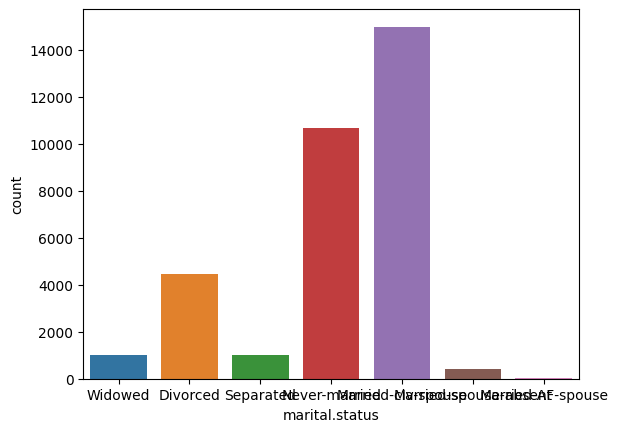

In [23]:
sns.countplot(x = data['marital.status'])

In [24]:
len(col)

9

In [25]:
col

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country', 'income'],
      dtype='object')

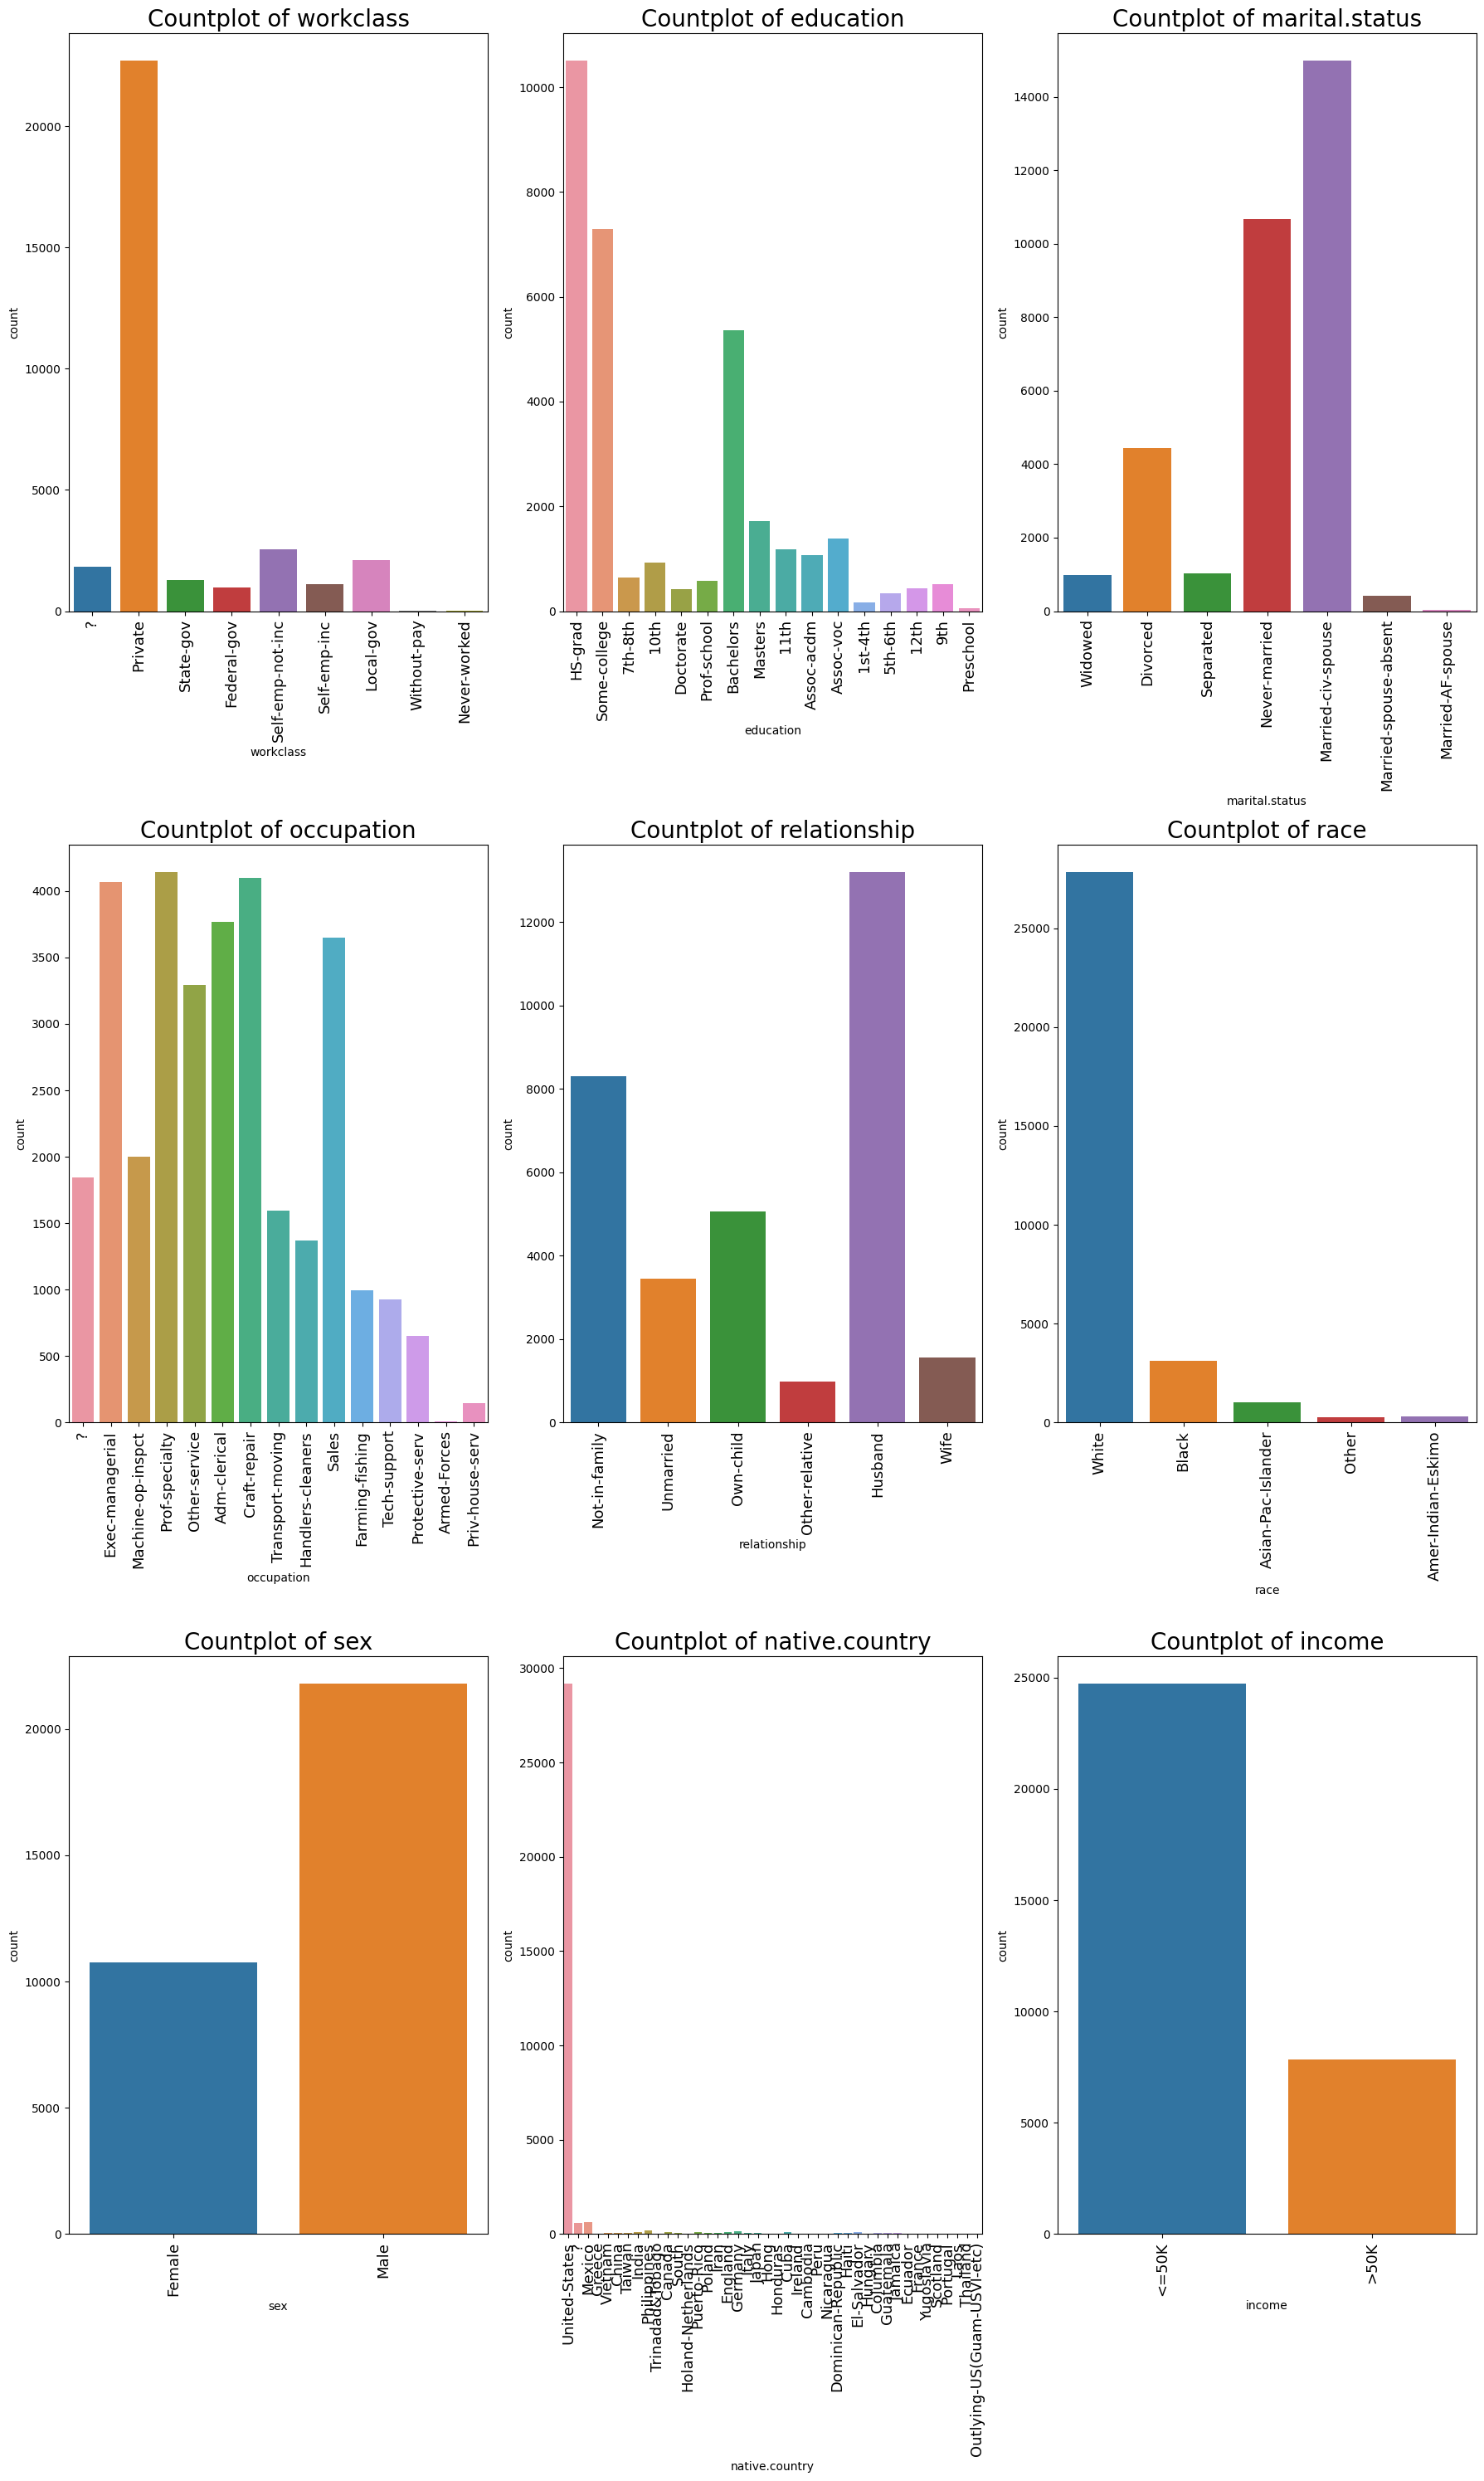

In [26]:
plt.figure(figsize=(18,30))
for i in range(len(col)):
  # if i!=0:
  plt.subplot(3,3,i+1)
  sns.countplot(x = data[col[i]])
  plt.title(f"Countplot of {col[i]}",fontsize=20)
  plt.xticks(rotation=90,fontsize=13)
  plt.tight_layout()

#Observation
1-From workclass Private has the highest count and other 
 
 Private             22696
 
 Self-emp-not-inc     2541
 
 Local-gov            2093
 
 ?                    1836
 
 State-gov            1297
 
 Self-emp-inc         1116
 
 Federal-gov           960
 
 Without-pay            14
 
 Never-worked            7

2-From education the count of every class is
 
 HS-grad         10501
 
 Some-college     7291
 
 Bachelors        5354
 
 Masters          1723
 
 Assoc-voc        1382
 
 11th             1175
 
 Assoc-acdm       1067
 
 10th              933
 
 7th-8th           646
 
 Prof-school       576
 
 9th               514
 
 12th              433
 
 Doctorate         413
 
 5th-6th           333
 
 1st-4th           168
 
 Preschool          51

3-From marital_status i can say
 
 Married-civ-spouse       14976
 
 Never-married            10682
 
 Divorced                  4443
 
 Separated                 1025
 
 Widowed                    993
 
 Married-spouse-absent      418
 
 Married-AF-spouse           23

4-from occupation i can say
 
 Prof-specialty       4140
 
 Craft-repair         4099
 
 Exec-managerial      4066
 
 Adm-clerical         3769
 
 Sales                3650
 
 Other-service        3295
 
 Machine-op-inspct    2002
 
 ?                    1843
 
 Transport-moving     1597
 
 Handlers-cleaners    1370
 
 Farming-fishing       994
 
 Tech-support          928
 
 Protective-serv       649
 
 Priv-house-serv       149
 
 Armed-Forces            9

5- from relationship counplot i can say it has
 
 Husband           13193
 
 Not-in-family      8304
 
 Own-child          5068
 
 Unmarried          3446
 
 Wife               1568
 
 Other-relative      981

6-from race i can say it has 

 White                 27815
 
 Black                  3124
 
 Asian-Pac-Islander     1039
 
 Amer-Indian-Eskimo      311
 
 Other                   271

 7-From countplot of native_country i can say only US has the high and good count other are just have few count only

8-From sex i can say

 Male      21789
 
 Female    10771

 male are more

9-From income i can say

 <=50K    24719
 
>50K      7841

 more people are there who have income less then 50k

In [27]:
data_int

age  fnlwgt  education.num  capital.gain  capital.loss  hours.per.week
0       90   77053              9             0          4356              40
1       82  132870              9             0          4356              18
2       66  186061             10             0          4356              40
3       54  140359              4             0          3900              40
4       41  264663             10             0          3900              40
...    ...     ...            ...           ...           ...             ...
32556   22  310152             10             0             0              40
32557   27  257302             12             0             0              38
32558   40  154374              9             0             0              40
32559   58  151910              9             0             0              40
32560   22  201490              9             0             0              20

[32561 rows x 6 columns]

In [28]:
col_int = data_int.columns

In [29]:
col_int

Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week'],
      dtype='object')

In [30]:
len(col_int)

6

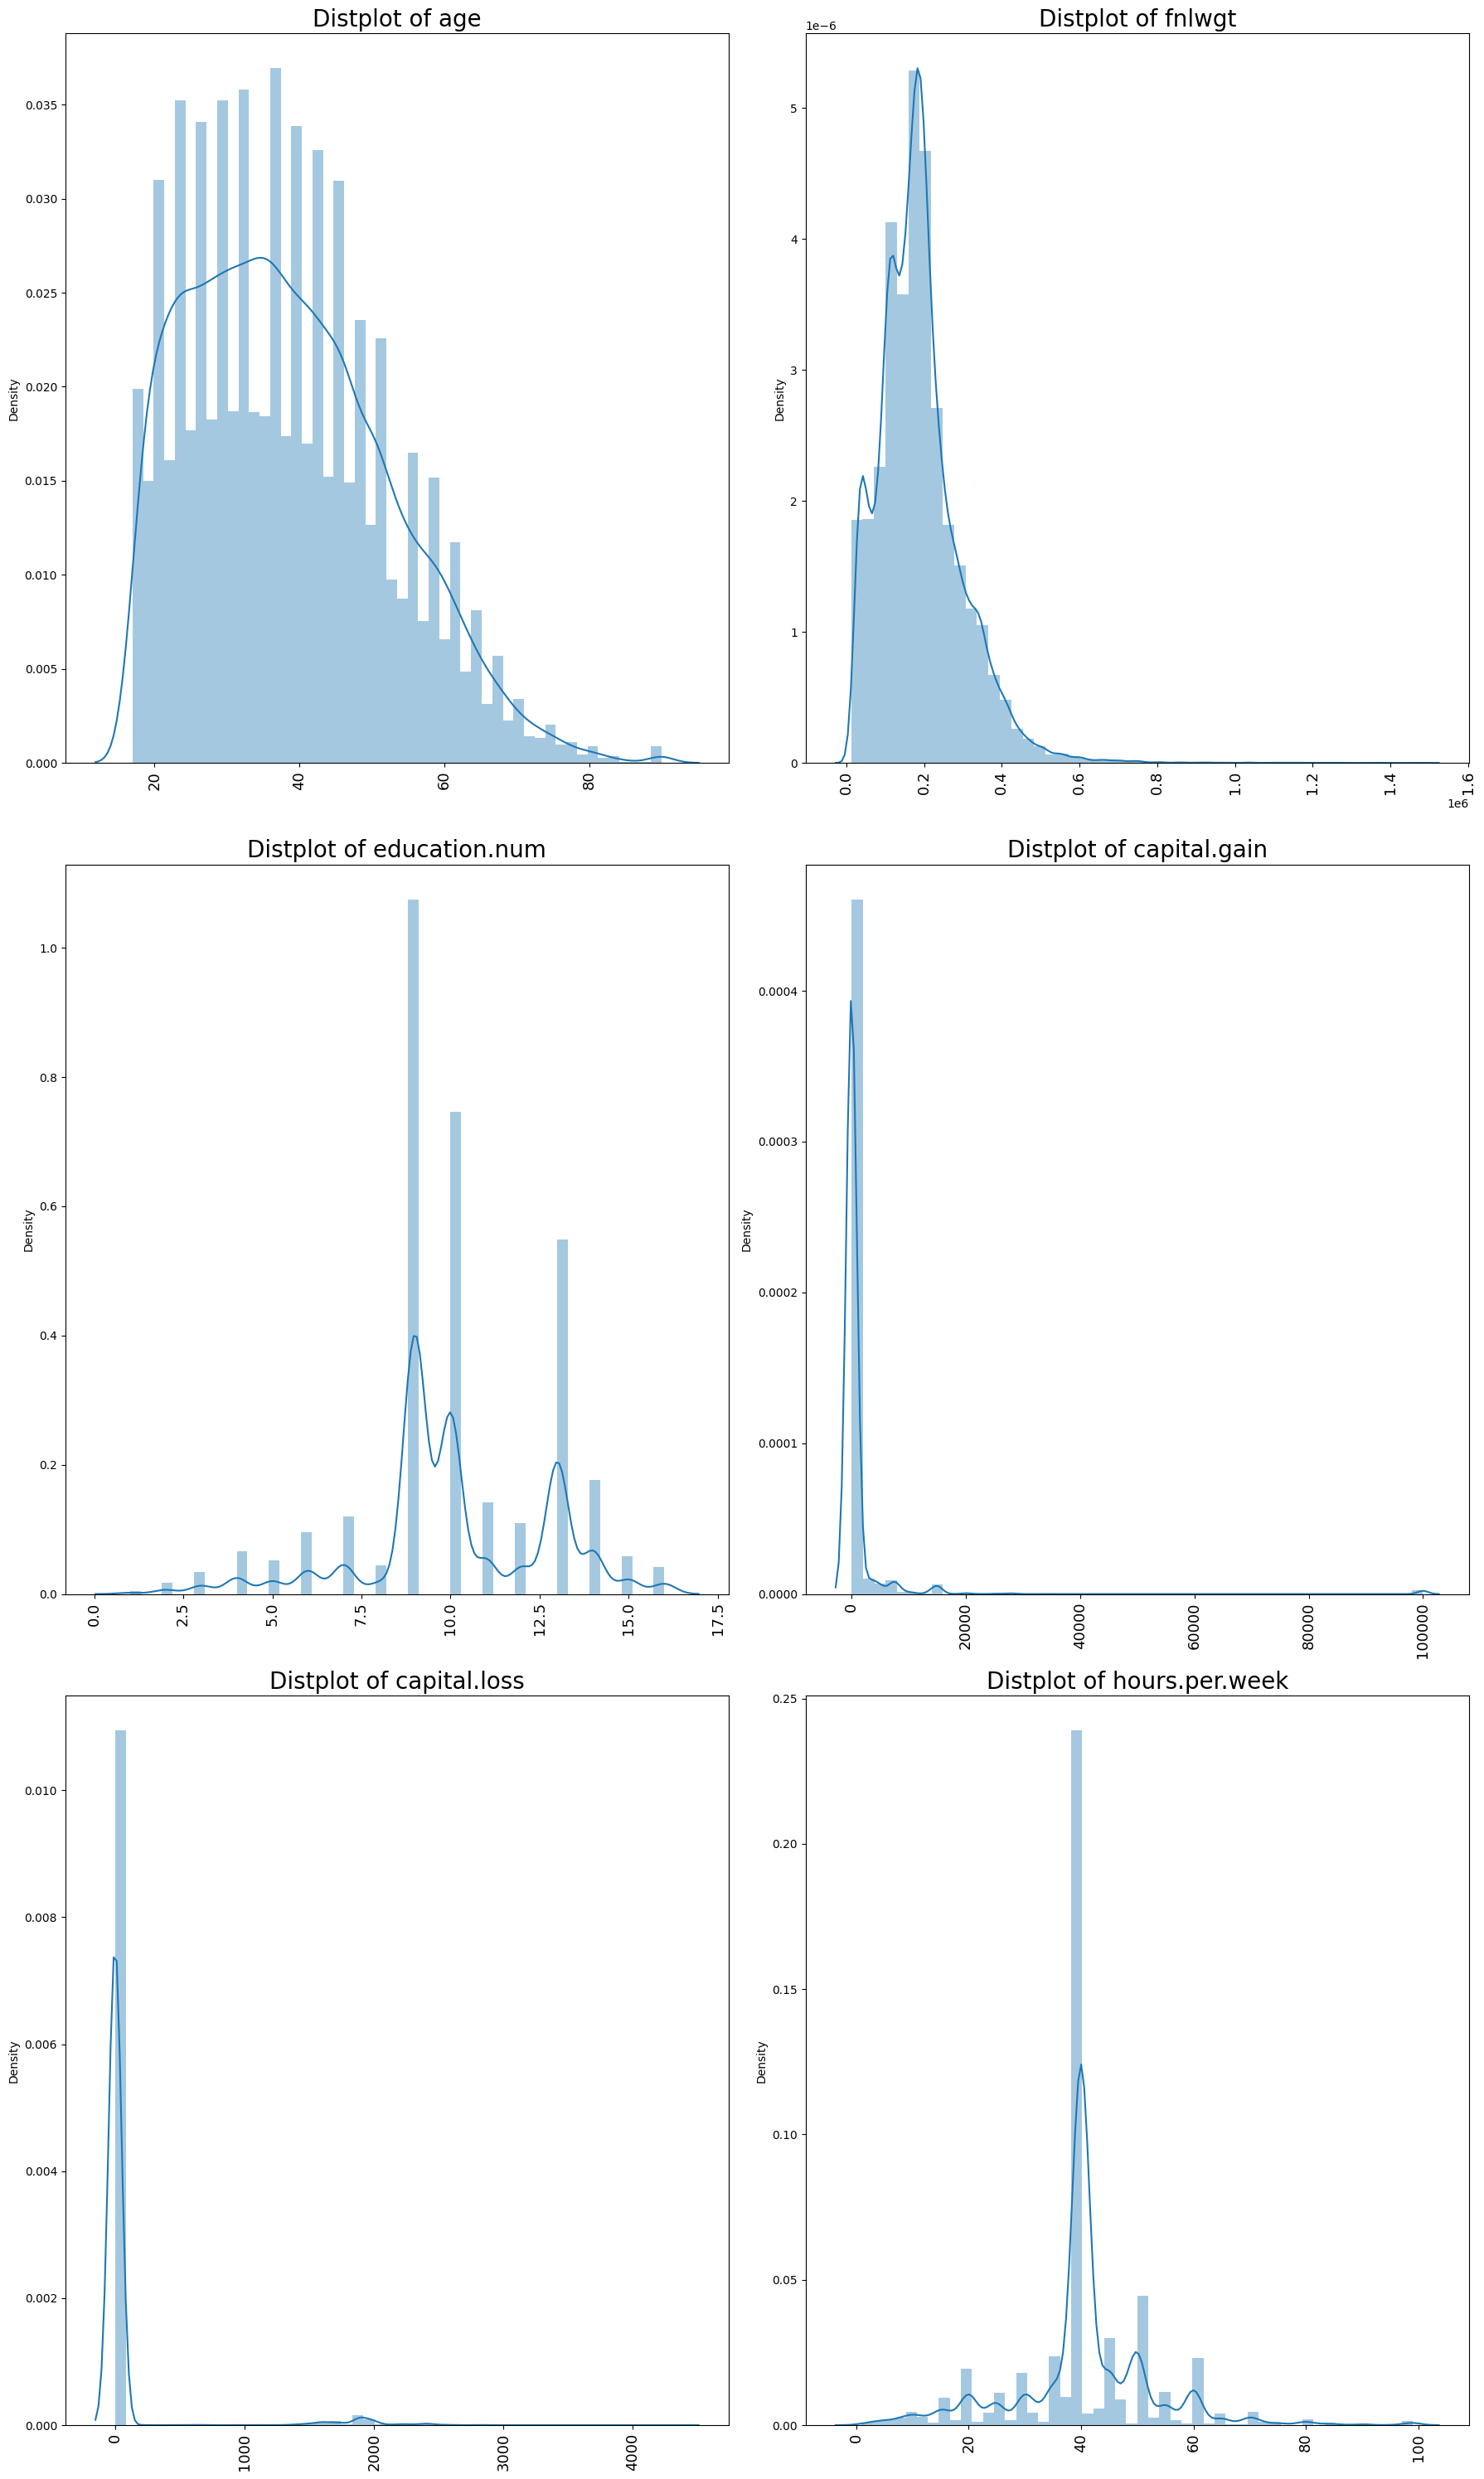

In [31]:
plt.figure(figsize=(18,30))
for i in range(len(col_int)):
  # if i!=0:
  plt.subplot(3,2,i+1)
  sns.distplot(x = data[col_int[i]])
  plt.title(f"Distplot of {col_int[i]}",fontsize=20)
  plt.xticks(rotation=90,fontsize=13)
  plt.tight_layout()

#Observation
1-only the value of fnlwgt is continuous so that distribution is right skewed so in right skewed we know mean>median>mode 

2-for other columns i can say they are discrete 

#Bivariate Analysis

In [32]:
col

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country', 'income'],
      dtype='object')

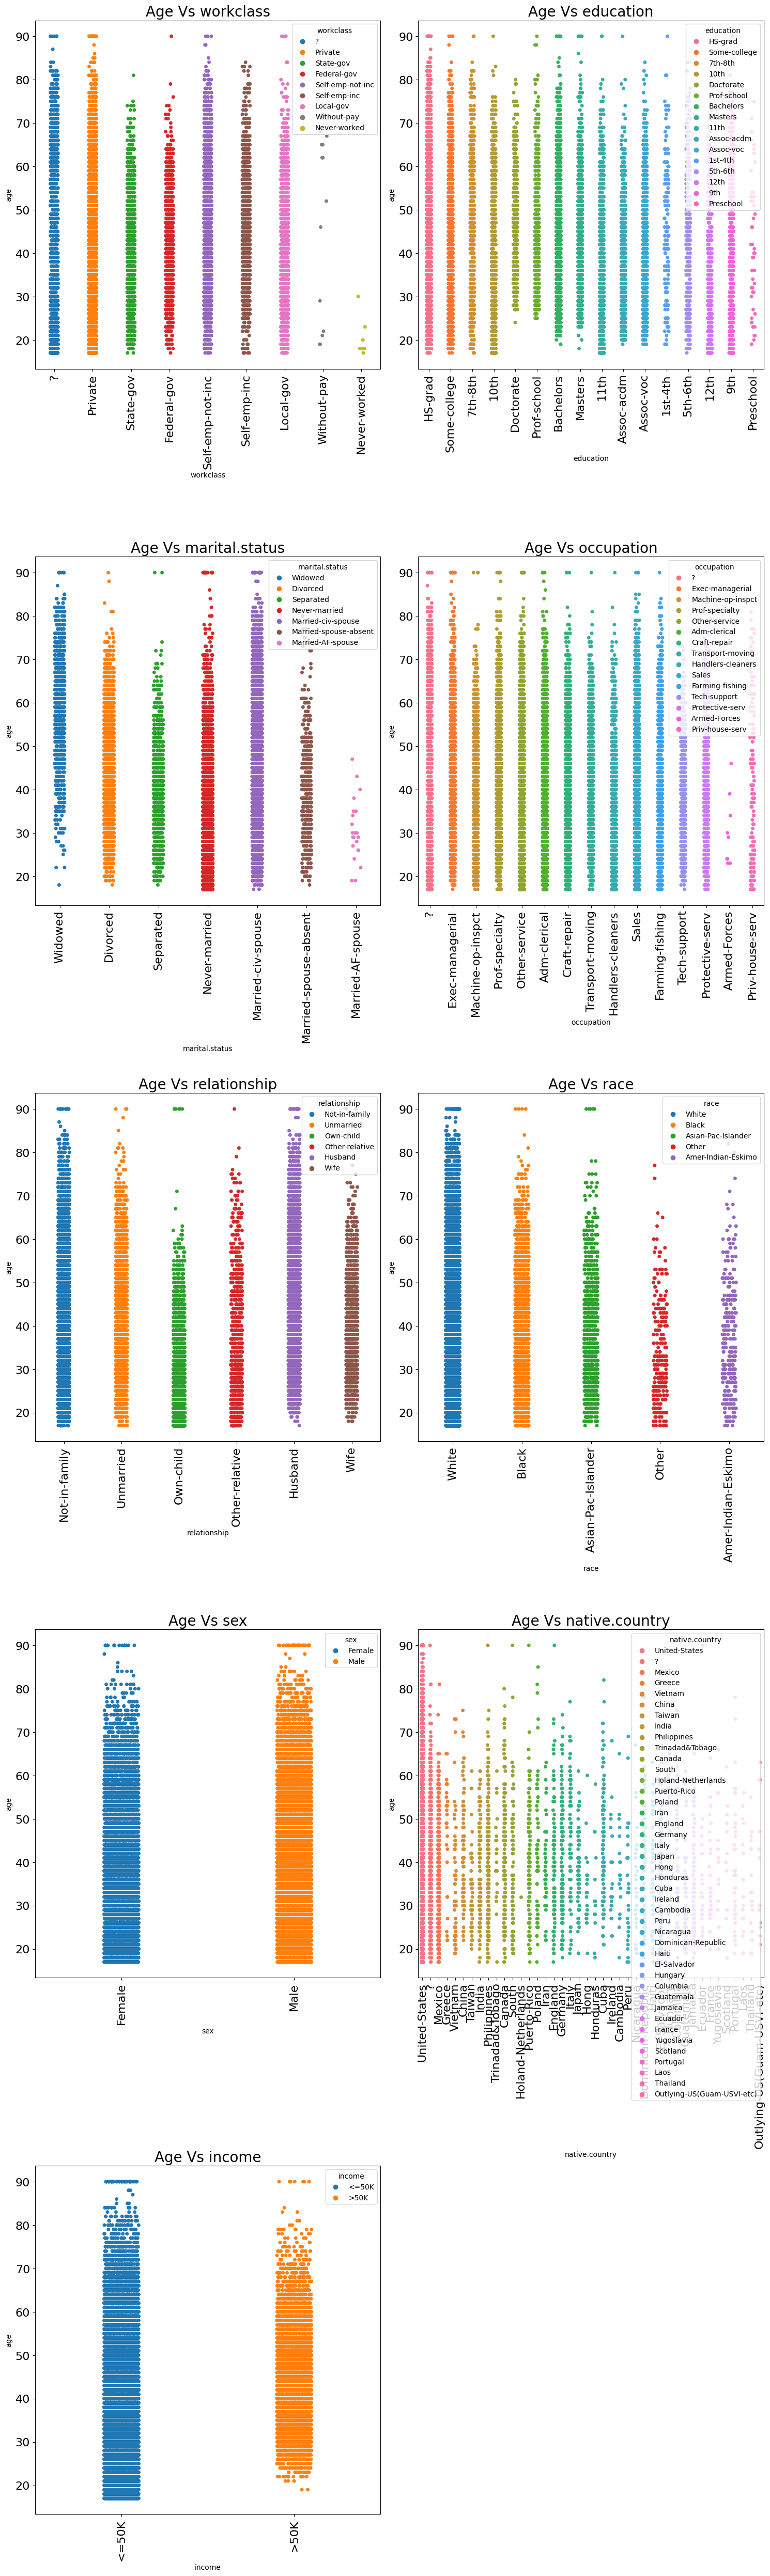

In [33]:
plt.figure(figsize=(15,80))

for i in range(len(col)):
  plt.subplot(8,2,i+1)
  sns.stripplot(y=data['age'],x = data[col[i]],hue=data[col[i]])
  plt.title(f"Age Vs {col[i]}",fontsize=20)
  plt.xticks(rotation=90,fontsize=16)
  plt.yticks(fontsize=16)
  plt.tight_layout()

#Obseravtion

Individuals working in the gov. sector have almost age 70 to 80 with few outliers which must be the retirement age for them.

there are no individual who do not work after age of 30. 

there are no individuals of age >70 belonging to the pre school education category while doctorates and professors appers from late 20's as they have to study for more years to get to that level of education.

same is the case with education num, as the education number increase age also in increased. 

there are no people after the age of 50 in the married to armed forced category with just a few outliers.

Windowed category has seen icrease as the age seems to increase there are very few  widow at early age 

there are more no. of working men at higher age than women

there are very few people belonging from other countries with high age

#Multivariate Analysis

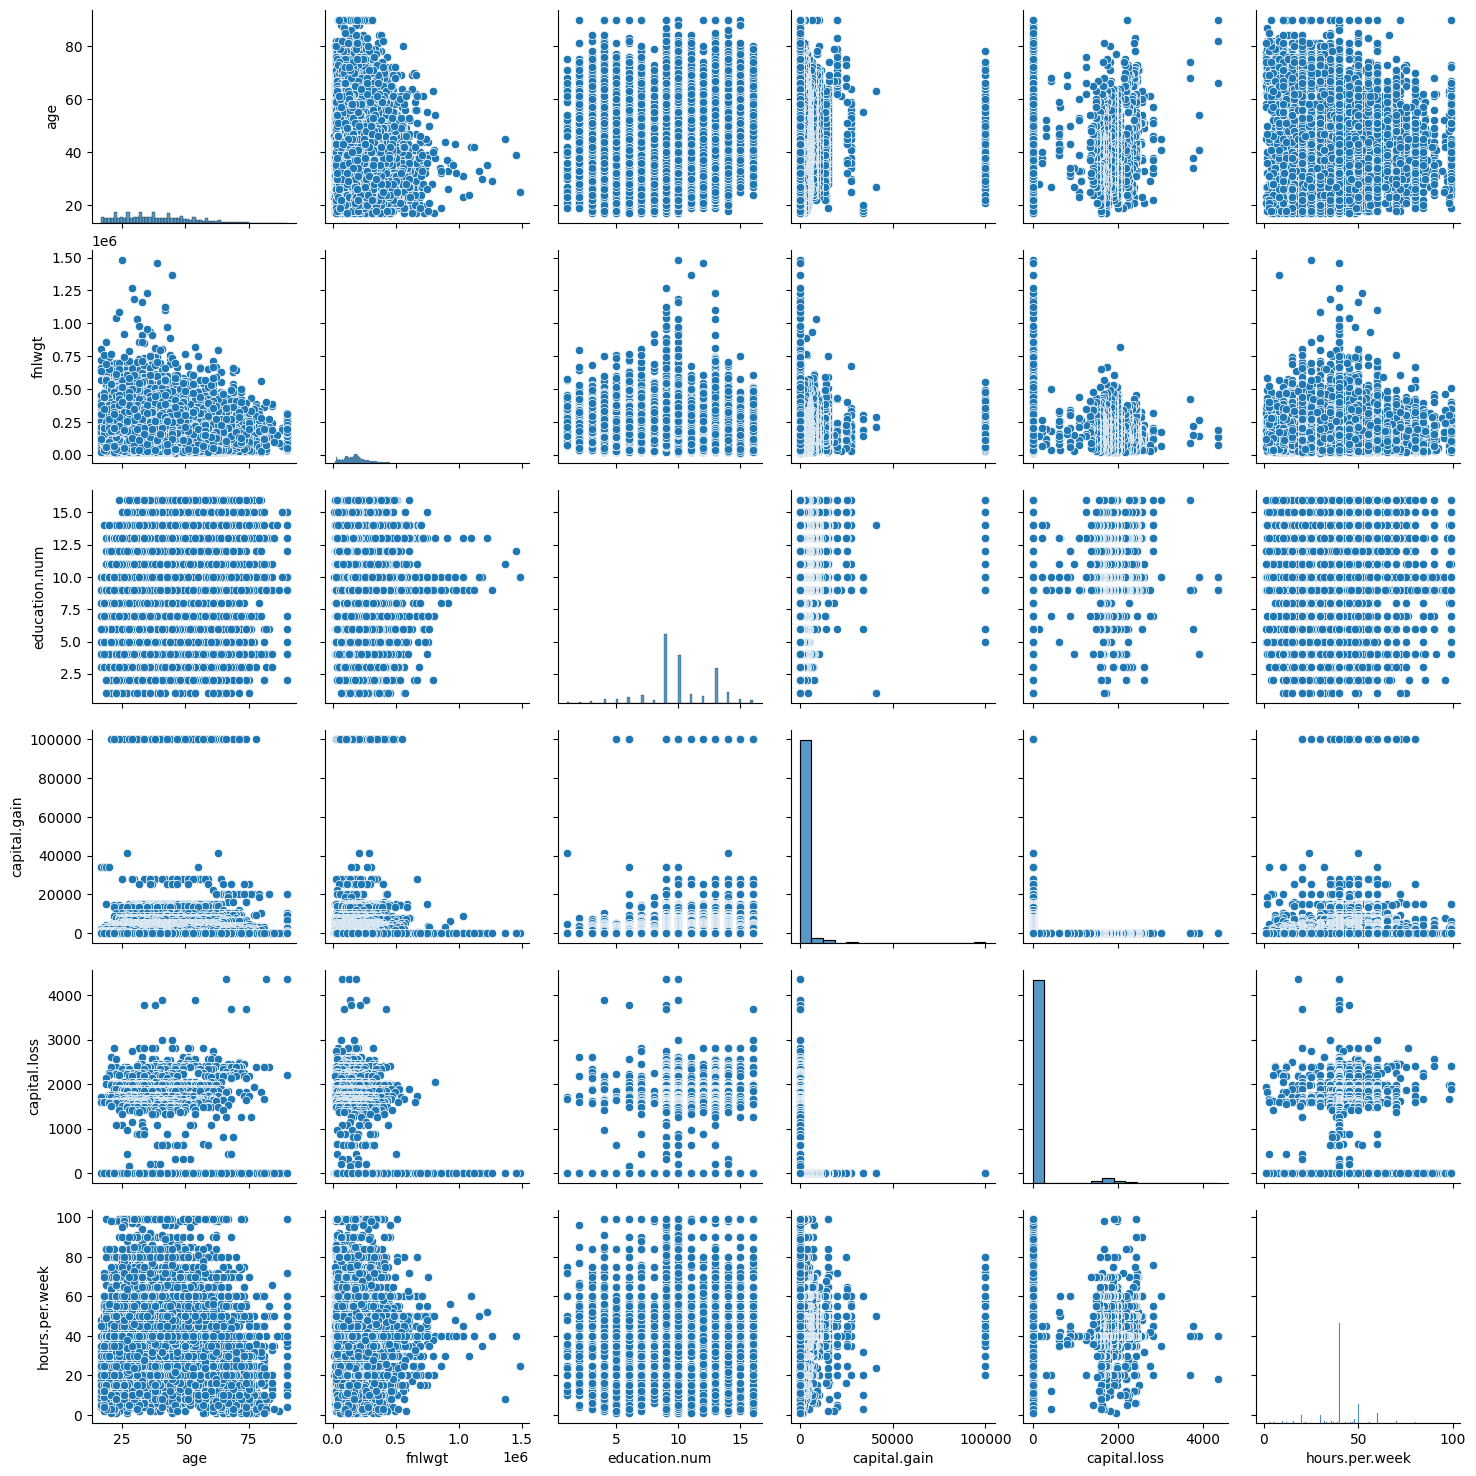

In [34]:
sns.pairplot(data)

In [35]:
data.head()

age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States  <=50K  
2          4356              40  United-States  <=50K  
3          3900              40  United-States  <=50K  
4          3900              40  United-States  <=50K

In [36]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,StandardScaler,power_transform

In [37]:
Oe = OrdinalEncoder()
def ordinal_encoder(df,column):
  df[column] = Oe.fit_transform(df[column])
  return df

In [38]:
col

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country', 'income'],
      dtype='object')

In [39]:
data = ordinal_encoder(data,col)

In [40]:
data

age  workclass  fnlwgt  education  education.num  marital.status  \
0       90        0.0   77053       11.0              9             6.0   
1       82        4.0  132870       11.0              9             6.0   
2       66        0.0  186061       15.0             10             6.0   
3       54        4.0  140359        5.0              4             0.0   
4       41        4.0  264663       15.0             10             5.0   
...    ...        ...     ...        ...            ...             ...   
32556   22        4.0  310152       15.0             10             4.0   
32557   27        4.0  257302        7.0             12             2.0   
32558   40        4.0  154374       11.0              9             2.0   
32559   58        4.0  151910       11.0              9             6.0   
32560   22        4.0  201490       11.0              9             4.0   

       occupation  relationship  race  sex  capital.gain  capital.loss  \
0             0.0           1.0   4.0  0.0             0          4356   
1             4.0           1.0   4.0  0.0             0          4356   
2             0.0           4.0   2.0  0.0             0          4356   
3             7.0           4.0   4.0  0.0             0          3900   
4            10.0           3.0   4.0  0.0             0          3900   
...           ...           ...   ...  ...           ...           ...   
32556        11.0           1.0   4.0  1.0             0             0   
32557        13.0           5.0   4.0  0.0             0             0   
32558         7.0           0.0   4.0  1.0             0             0   
32559         1.0           4.0   4.0  0.0             0             0   
32560         1.0           3.0   4.0  1.0             0             0   

       hours.per.week  native.country  income  
0                  40            39.0     0.0  
1                  18            39.0     0.0  
2                  40            39.0     0.0  
3                  40            39.0     0.0  
4                  40            39.0     0.0  
...               ...             ...     ...  
32556              40            39.0     0.0  
32557              38            39.0     0.0  
32558              40            39.0     1.0  
32559              40            39.0     0.0  
32560              20            39.0     0.0  

[32561 rows x 15 columns]

In [41]:
def preprocessing(df):
  df.dropna(inplace=True)

  X = df.drop(['income'],axis=1)
  y = df['income']
  return X,y

In [42]:
X,y = preprocessing(data)

In [43]:
X

age  workclass  fnlwgt  education  education.num  marital.status  \
0       90        0.0   77053       11.0              9             6.0   
1       82        4.0  132870       11.0              9             6.0   
2       66        0.0  186061       15.0             10             6.0   
3       54        4.0  140359        5.0              4             0.0   
4       41        4.0  264663       15.0             10             5.0   
...    ...        ...     ...        ...            ...             ...   
32556   22        4.0  310152       15.0             10             4.0   
32557   27        4.0  257302        7.0             12             2.0   
32558   40        4.0  154374       11.0              9             2.0   
32559   58        4.0  151910       11.0              9             6.0   
32560   22        4.0  201490       11.0              9             4.0   

       occupation  relationship  race  sex  capital.gain  capital.loss  \
0             0.0           1.0   4.0  0.0             0          4356   
1             4.0           1.0   4.0  0.0             0          4356   
2             0.0           4.0   2.0  0.0             0          4356   
3             7.0           4.0   4.0  0.0             0          3900   
4            10.0           3.0   4.0  0.0             0          3900   
...           ...           ...   ...  ...           ...           ...   
32556        11.0           1.0   4.0  1.0             0             0   
32557        13.0           5.0   4.0  0.0             0             0   
32558         7.0           0.0   4.0  1.0             0             0   
32559         1.0           4.0   4.0  0.0             0             0   
32560         1.0           3.0   4.0  1.0             0             0   

       hours.per.week  native.country  
0                  40            39.0  
1                  18            39.0  
2                  40            39.0  
3                  40            39.0  
4                  40            39.0  
...               ...             ...  
32556              40            39.0  
32557              38            39.0  
32558              40            39.0  
32559              40            39.0  
32560              20            39.0  

[32561 rows x 14 columns]

In [44]:
y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
32556    0.0
32557    0.0
32558    1.0
32559    0.0
32560    0.0
Name: income, Length: 32561, dtype: float64

<Axes: >

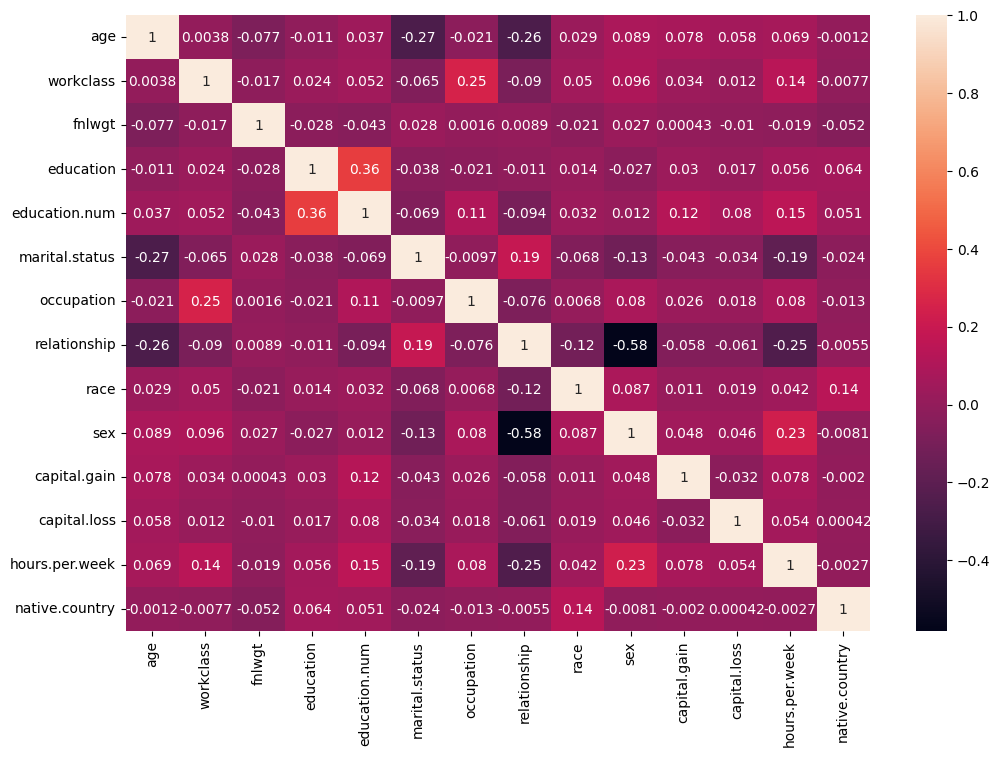

In [45]:
X_corr = X.corr()
plt.figure(figsize=(12,8))
sns.heatmap(X_corr,annot=True)

In [46]:
x = X

In [47]:
len(X.columns.values)

14

In [48]:
X.head()

age  workclass  fnlwgt  education  education.num  marital.status  \
0   90        0.0   77053       11.0              9             6.0   
1   82        4.0  132870       11.0              9             6.0   
2   66        0.0  186061       15.0             10             6.0   
3   54        4.0  140359        5.0              4             0.0   
4   41        4.0  264663       15.0             10             5.0   

   occupation  relationship  race  sex  capital.gain  capital.loss  \
0         0.0           1.0   4.0  0.0             0          4356   
1         4.0           1.0   4.0  0.0             0          4356   
2         0.0           4.0   2.0  0.0             0          4356   
3         7.0           4.0   4.0  0.0             0          3900   
4        10.0           3.0   4.0  0.0             0          3900   

   hours.per.week  native.country  
0              40            39.0  
1              18            39.0  
2              40            39.0  
3              40            39.0  
4              40            39.0

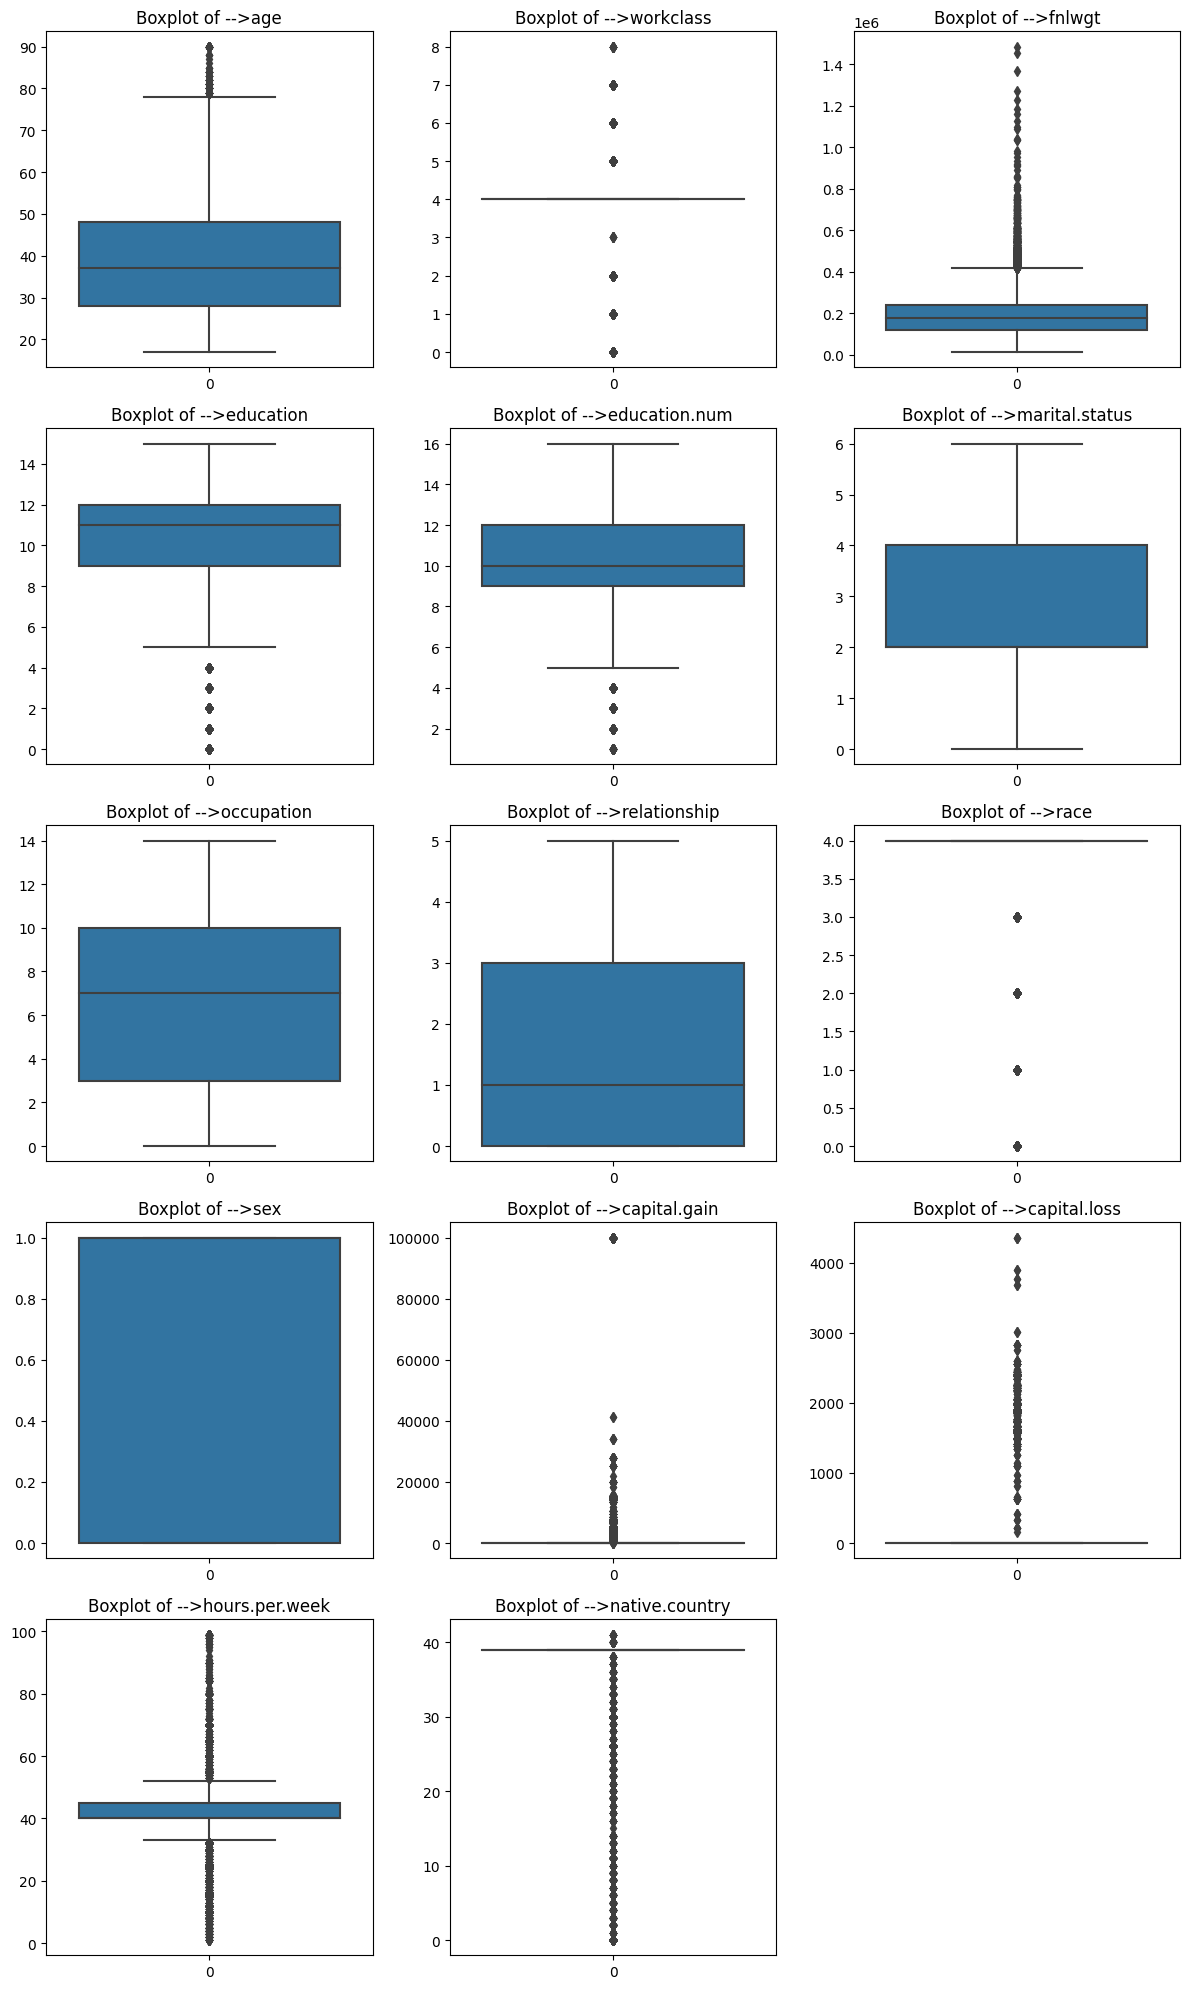

In [49]:
X_val = X.columns.values
plt.figure(figsize=(12,20))
for i in range(len(X_val)):
  plt.subplot(5,3,i+1)
  sns.boxplot(X[X_val[i]])
  plt.title(f"Boxplot of -->{X_val[i]}")
  plt.tight_layout()

In [50]:
for col in X.columns:
  percentile=X[col].quantile([0.01,0.98]).values
  X[col][X[col]<=percentile[0]]=percentile[0]
  X[col][X[col]>=percentile[1]]=percentile[1]

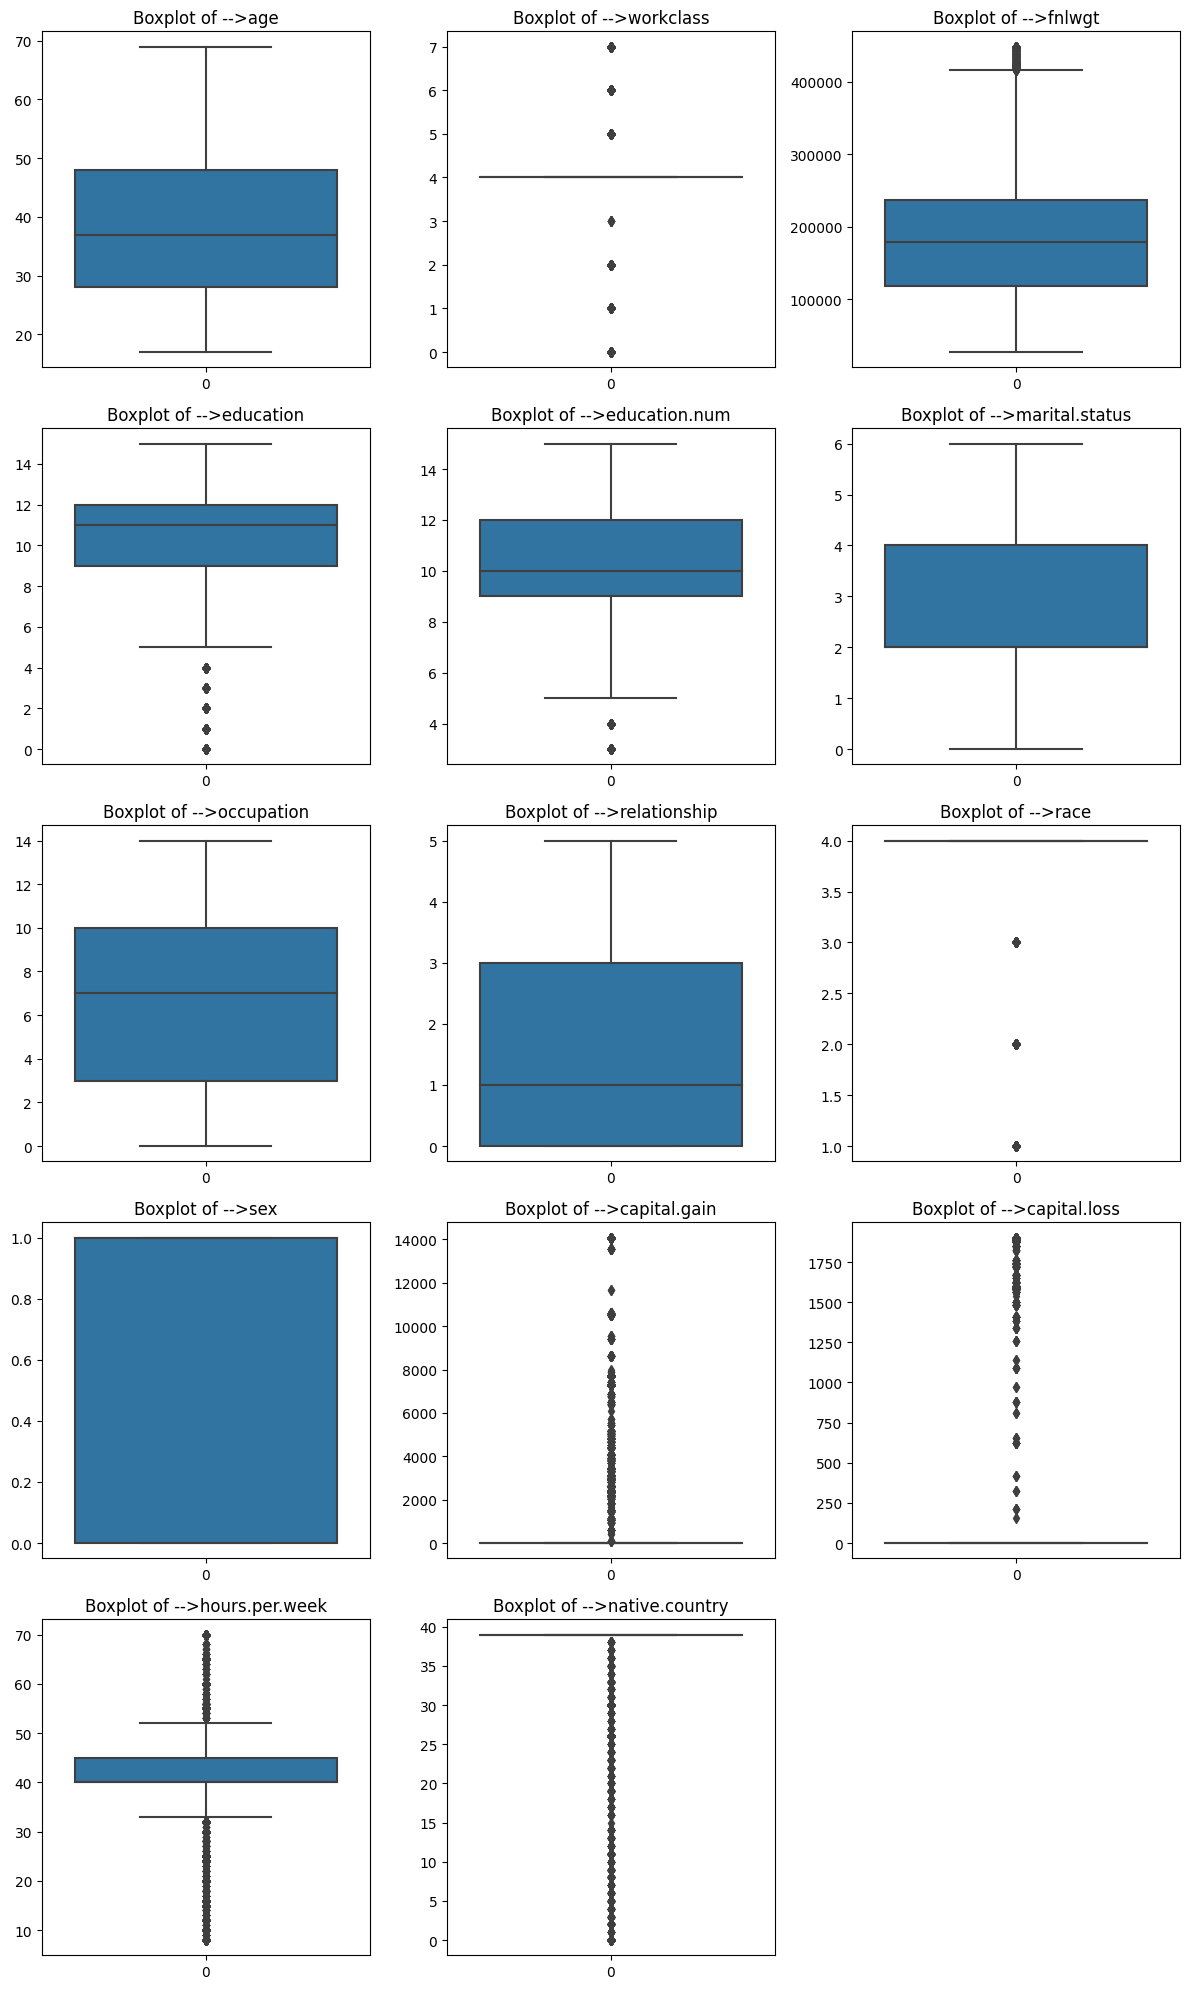

In [51]:
X_val = X.columns.values
plt.figure(figsize=(12,20))
for i in range(len(X_val)):
  plt.subplot(5,3,i+1)
  sns.boxplot(X[X_val[i]])
  plt.title(f"Boxplot of -->{X_val[i]}")
  plt.tight_layout()

<Axes: xlabel='income', ylabel='count'>

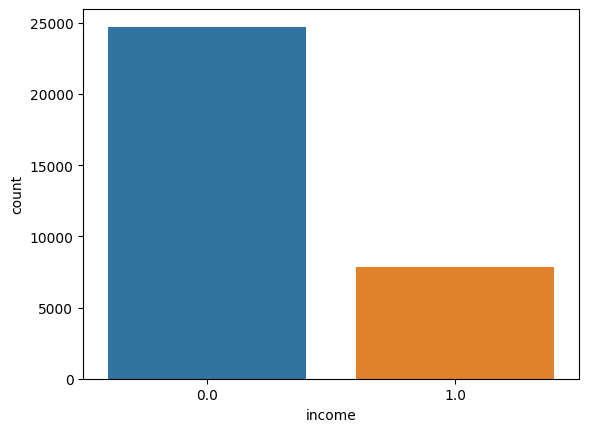

In [52]:
sns.countplot(x = data['income'])

In [53]:
data['income'].value_counts()

0.0    24720
1.0     7841
Name: income, dtype: int64

In [54]:
# import mlrose
from imblearn.over_sampling import SMOTE
from yellowbrick.classifier.rocauc import roc_auc
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [55]:
def do_something(name):
  full_name = name
  first_name = name.split()[0]
  last_name = name.split()[1]
  return first_name,last_name

In [56]:
first_name,last_name = do_something('satyam tripathi')

In [57]:
first_name

'satyam'

In [58]:
last_name

'tripathi'

In [59]:
smote=SMOTE(random_state=20)
X_res,y_res=smote.fit_resample(X,y)
X_new=pd.DataFrame(X_res,columns=x.columns)
y_new=pd.DataFrame(y_res,columns=['income'])

In [60]:
X_res

age  workclass         fnlwgt  education  education.num  \
0       69   0.000000   77053.000000  11.000000              9   
1       69   4.000000  132870.000000  11.000000              9   
2       66   0.000000  186061.000000  15.000000             10   
3       54   4.000000  140359.000000   5.000000              4   
4       41   4.000000  264663.000000  15.000000             10   
...    ...        ...            ...        ...            ...   
49435   43   4.753717   33341.685853  11.000000              9   
49436   62   4.496477  247359.837939  11.978862             11   
49437   41   1.883565  107962.108870  11.116435             13   
49438   40   4.335850   34811.000135  15.000000             10   
49439   46   4.000000  160848.314877   9.375046             12   

       marital.status  occupation  relationship      race       sex  \
0            6.000000    0.000000      1.000000  4.000000  0.000000   
1            6.000000    4.000000      1.000000  4.000000  0.000000   
2            6.000000    0.000000      4.000000  2.000000  0.000000   
3            0.000000    7.000000      4.000000  4.000000  0.000000   
4            5.000000   10.000000      3.000000  4.000000  0.000000   
...               ...         ...           ...       ...       ...   
49435        1.246283    3.000000      0.376859  4.000000  1.000000   
49436        2.000000    7.021138      0.000000  4.000000  1.000000   
49437        2.000000    8.232871      0.000000  1.883565  1.000000   
49438        0.671699   10.977354      0.664150  4.000000  1.000000   
49439        2.000000   13.187523      4.062385  4.000000  0.187523   

       capital.gain  capital.loss  hours.per.week  native.country  
0                 0          1902              40       39.000000  
1                 0          1902              18       39.000000  
2                 0          1902              40       39.000000  
3                 0          1902              40       39.000000  
4                 0          1902              40       39.000000  
...             ...           ...             ...             ...  
49435             0             0              49       39.000000  
49436             0             0              45       39.000000  
49437             0          1902              42       36.178086  
49438             0             0              50       39.000000  
49439             0             0              24       39.000000  

[49440 rows x 14 columns]

In [61]:
y_res

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
49435    1.0
49436    1.0
49437    1.0
49438    1.0
49439    1.0
Name: income, Length: 49440, dtype: float64

<Axes: xlabel='income', ylabel='count'>

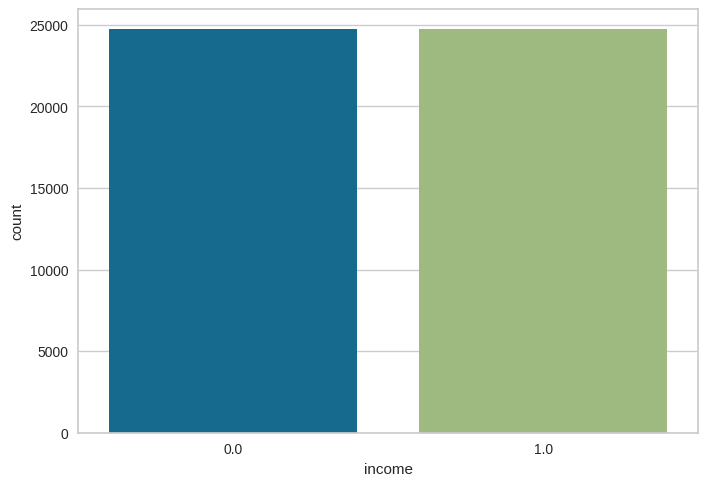

In [62]:
sns.countplot(x = y_new['income'])

In [63]:
data.shape

(32561, 15)

In [64]:
X_new.shape

(49440, 14)

#Checking skewness

In [65]:
X_new.skew()

age               0.193633
workclass        -0.737036
fnlwgt            0.672048
education        -1.029201
education.num    -0.438432
marital.status    0.322968
occupation        0.052333
relationship      1.083858
race             -2.475504
sex              -1.044597
capital.gain      3.054085
capital.loss      3.655930
hours.per.week   -0.350281
native.country   -3.731092
dtype: float64

In [66]:
X_new=power_transform(X_new,method='yeo-johnson')
X_new=pd.DataFrame(X_new,columns=x.columns)

In [67]:
X_new.skew()

age              -0.041602
workclass         0.087823
fnlwgt           -0.030121
education        -0.206946
education.num    -0.024550
marital.status    0.002791
occupation       -0.179873
relationship      0.285139
race             -1.990762
sex              -0.952245
capital.gain      2.233906
capital.loss      3.543799
hours.per.week    0.122765
native.country   -2.581701
dtype: float64

#Feature scaling

In [68]:
scaler=StandardScaler()
X_new=scaler.fit_transform(X_new)
X_new=pd.DataFrame(X_new,columns=x.columns)

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train,X_test,y_train,y_test = train_test_split(X_new,y_new,test_size=0.3,random_state=42)

In [71]:
X_train.shape

(34608, 14)

In [72]:
X_test.shape

(14832, 14)

In [73]:
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
!pip install scikit-plot
import scikitplot as skplt
from lightgbm import LGBMClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [74]:
models={
    "LogisticRegression":LogisticRegression(),
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "ExtraTreesClassifier":ExtraTreesClassifier(),
    "RandomForestClassifier":RandomForestClassifier(),
    "LGBMClassifier":LGBMClassifier()
}

In [75]:
for name,model in models.items():
  print(model)

LogisticRegression()
DecisionTreeClassifier()
ExtraTreesClassifier()
RandomForestClassifier()
LGBMClassifier()


In [76]:
from imblearn.over_sampling import SMOTE
from yellowbrick.classifier.rocauc import roc_auc
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,StratifiedKFold

*************************************************** LogisticRegression ************************************************************


Accuracy_Score 0.7646305285868392


SCORE 0.7646305285868392


Confusion metrics


[[5476 1917]
 [1574 5865]]
CLASSIFICATION REPORT


              precision    recall  f1-score   support

         0.0       0.78      0.74      0.76      7393
         1.0       0.75      0.79      0.77      7439

    accuracy                           0.76     14832
   macro avg       0.77      0.76      0.76     14832
weighted avg       0.77      0.76      0.76     14832

Cross_Val_Score 0.7659991909385113


ROC AUC CURVE


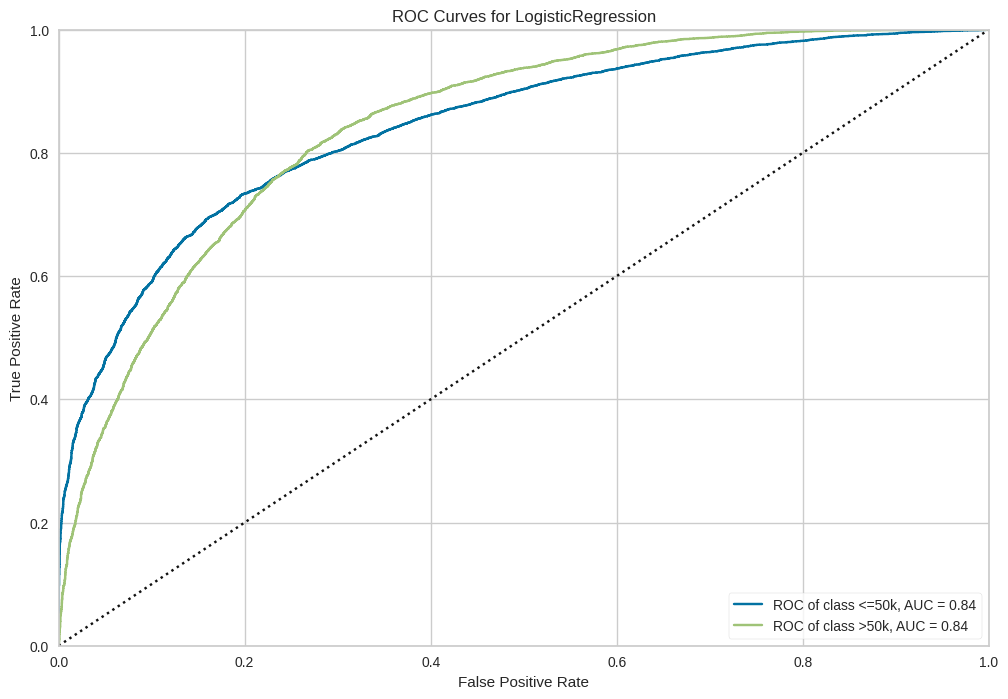

MODEL LEARNING CURVE


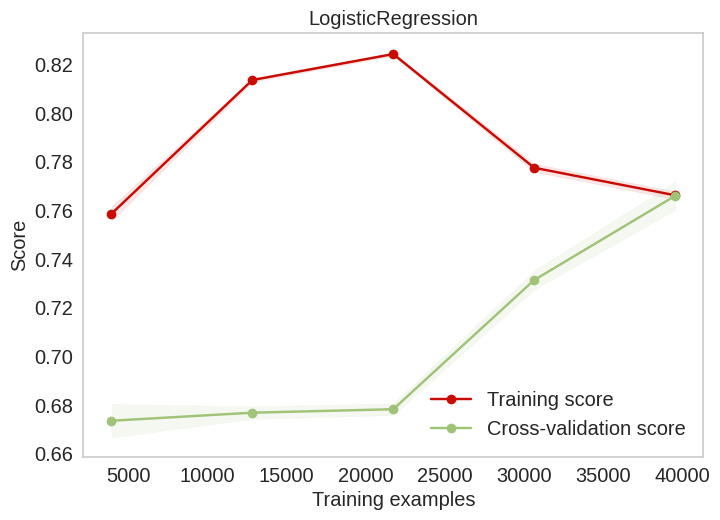

*************************************************** DecisionTreeClassifier ************************************************************


Accuracy_Score 0.8622572815533981


SCORE 0.8622572815533981


Confusion metrics


[[6354 1039]
 [1004 6435]]
CLASSIFICATION REPORT


              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86      7393
         1.0       0.86      0.87      0.86      7439

    accuracy                           0.86     14832
   macro avg       0.86      0.86      0.86     14832
weighted avg       0.86      0.86      0.86     14832

Cross_Val_Score 0.8595671521035598


ROC AUC CURVE


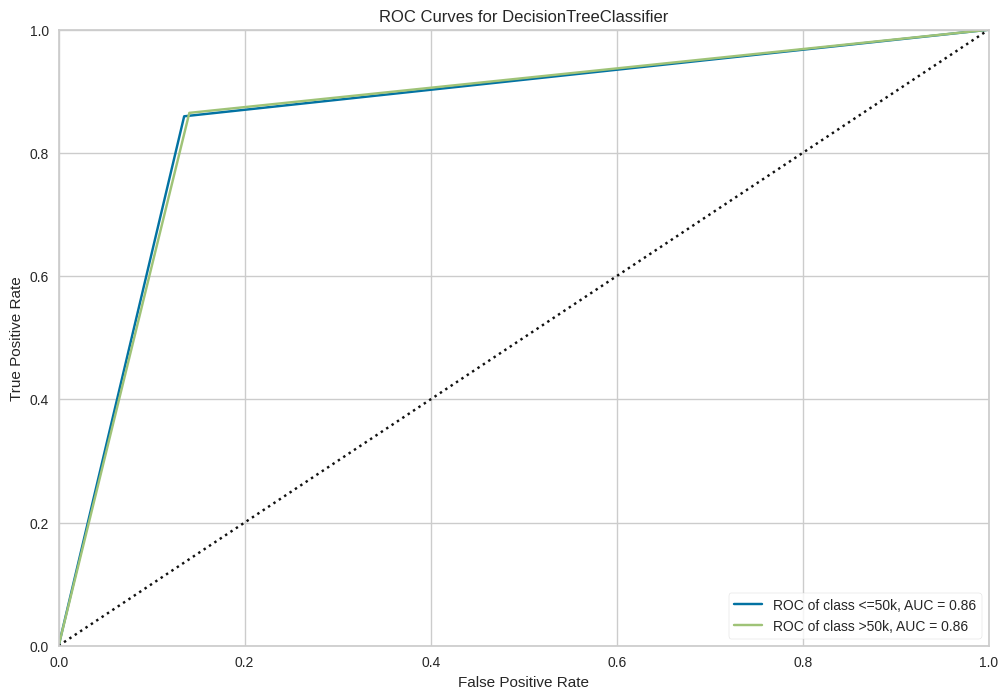

MODEL LEARNING CURVE


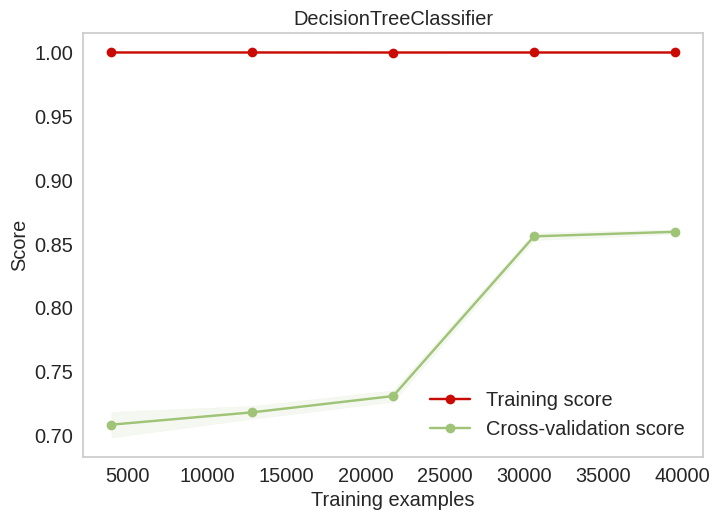

*************************************************** ExtraTreesClassifier ************************************************************


Accuracy_Score 0.893675836030205


SCORE 0.893675836030205


Confusion metrics


[[6609  784]
 [ 793 6646]]
CLASSIFICATION REPORT


              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89      7393
         1.0       0.89      0.89      0.89      7439

    accuracy                           0.89     14832
   macro avg       0.89      0.89      0.89     14832
weighted avg       0.89      0.89      0.89     14832

Cross_Val_Score 0.8962783171521036


ROC AUC CURVE


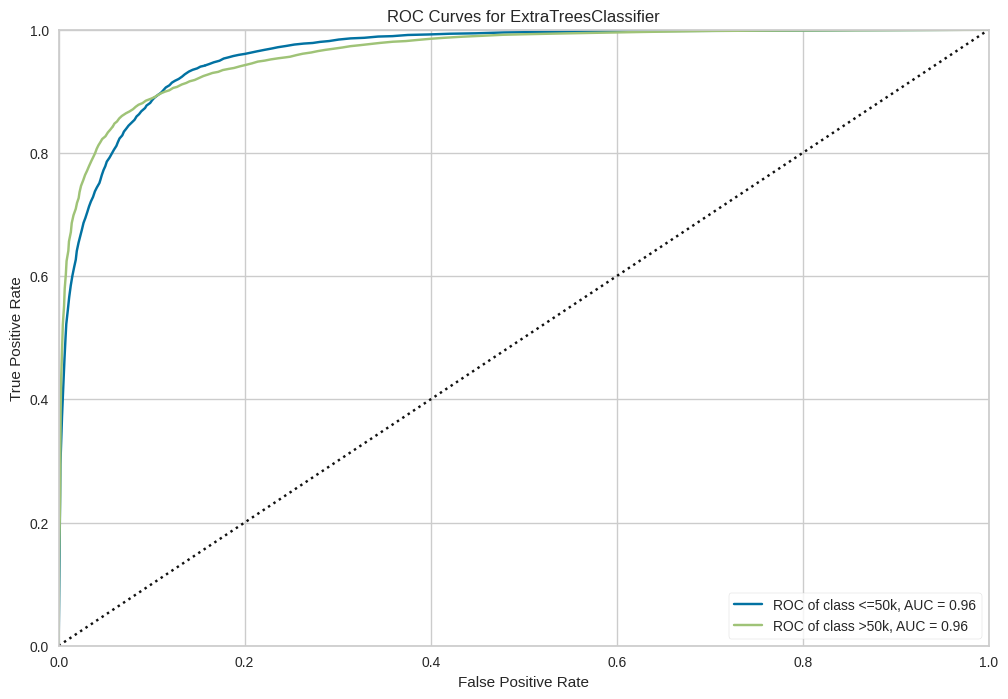

MODEL LEARNING CURVE


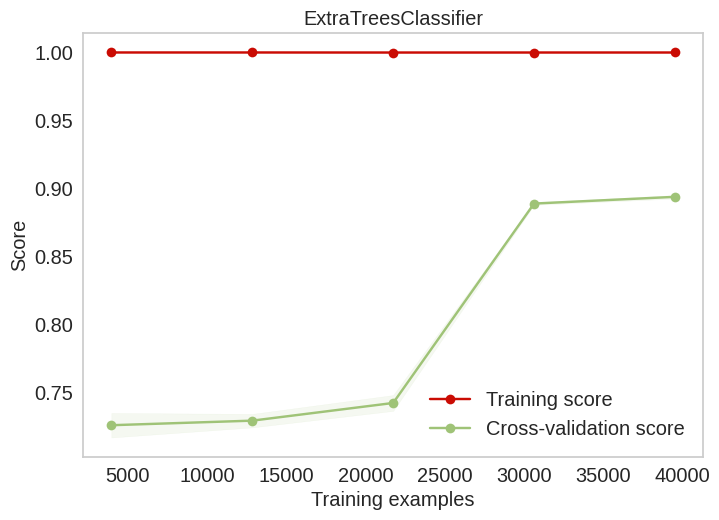

*************************************************** RandomForestClassifier ************************************************************


Accuracy_Score 0.8975188781014024


SCORE 0.8975188781014024


Confusion metrics


[[6726  667]
 [ 853 6586]]
CLASSIFICATION REPORT


              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90      7393
         1.0       0.91      0.89      0.90      7439

    accuracy                           0.90     14832
   macro avg       0.90      0.90      0.90     14832
weighted avg       0.90      0.90      0.90     14832

Cross_Val_Score 0.89917071197411


ROC AUC CURVE


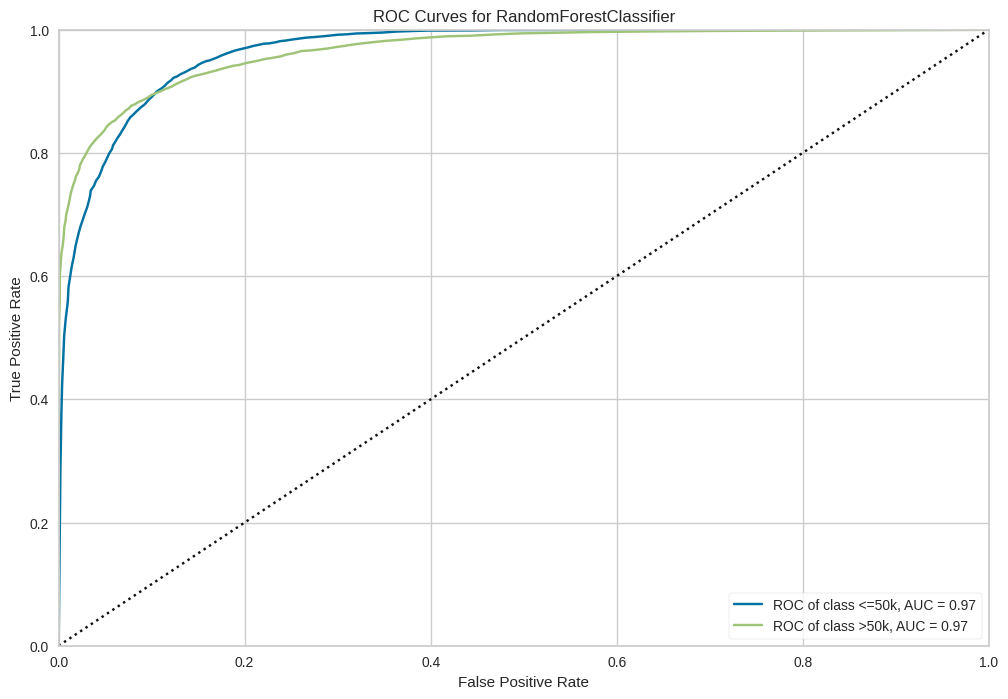

MODEL LEARNING CURVE


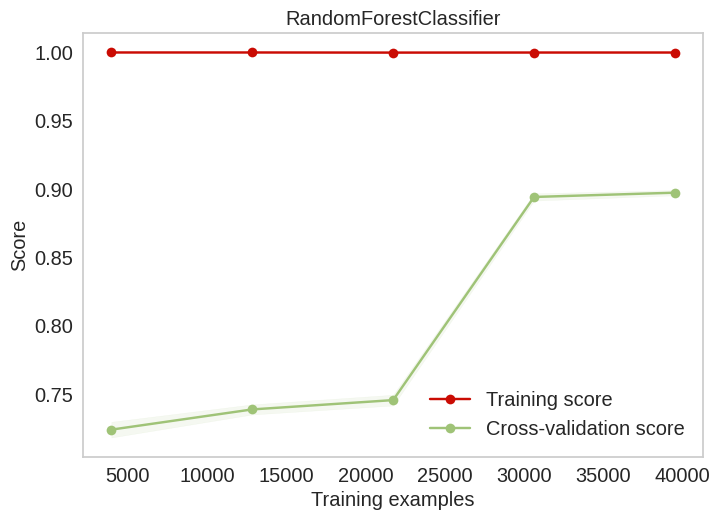

*************************************************** LGBMClassifier ************************************************************


Accuracy_Score 0.9113403451995685


SCORE 0.9113403451995685


Confusion metrics


[[6864  529]
 [ 786 6653]]
CLASSIFICATION REPORT


              precision    recall  f1-score   support

         0.0       0.90      0.93      0.91      7393
         1.0       0.93      0.89      0.91      7439

    accuracy                           0.91     14832
   macro avg       0.91      0.91      0.91     14832
weighted avg       0.91      0.91      0.91     14832

Cross_Val_Score 0.9113875404530744


ROC AUC CURVE


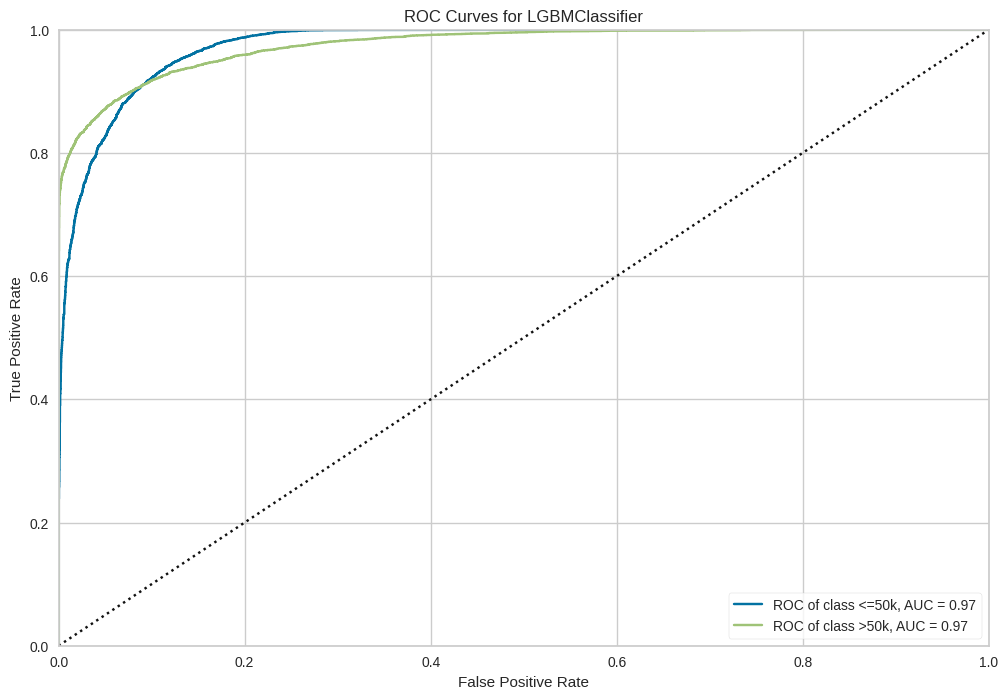

MODEL LEARNING CURVE


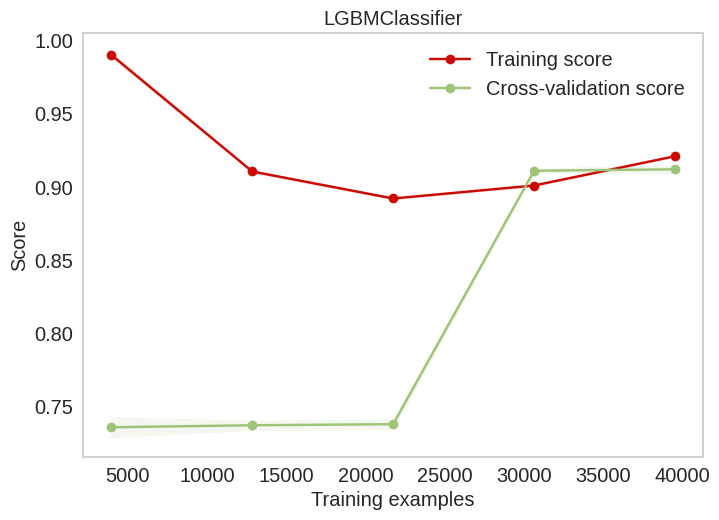

In [77]:
skf=StratifiedKFold(n_splits=5,shuffle=True)
Score=[]
CVS=[]
MODEL=[]
for name,model in models.items():
  print("***************************************************",name,"************************************************************")
  MODEL.append(name)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print('\n')
  ac=accuracy_score(y_test,y_pred)
  Score.append(ac)
  print("Accuracy_Score",ac)
  print('\n')
  # print("SCORE",model.score(X_test,y_test))
  print("\n")
  cm=confusion_matrix(y_test,y_pred)
  print('Confusion metrics')
  print('\n')
  print(cm)
  print("CLASSIFICATION REPORT")
  report=classification_report(y_test,y_pred)
  print('\n')
  print(report)
  csv=cross_val_score(model,X_new,y_new,cv=skf).mean()
  CVS.append(csv*100)
  print("Cross_Val_Score",csv)
  print('\n')
  print("ROC AUC CURVE")
  plt.figure(figsize=(12,8))
  roc_auc(model,X_train,y_train,X_test=X_test,y_test=y_test,classes=['<=50k','>50k'],micro=False,macro=False)
  print("MODEL LEARNING CURVE")
  skplt.estimators.plot_learning_curve(model,X_new,y_new,cv=skf,scoring='accuracy',text_fontsize='large',title=name)
  plt.show()

In [82]:
0.98*100

98.0

In [78]:
dict1={'Model_Name':MODEL,'Score':Score,'CVS':CVS}

In [79]:
RESULT=pd.DataFrame(dict1)

In [80]:
RESULT

Model_Name     Score        CVS
0      LogisticRegression  0.764631  76.599919
1  DecisionTreeClassifier  0.862257  85.956715
2    ExtraTreesClassifier  0.893676  89.627832
3  RandomForestClassifier  0.897519  89.917071
4          LGBMClassifier  0.911340  91.138754

In [ ]:
RF=RandomForestClassifier()
RF.fit(X_train,y_train)

In [ ]:
RF.get_params()

In [83]:
LGB=LGBMClassifier()
LGB.fit(X_train,y_train)

LGBMClassifier()

In [84]:
LGB.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [85]:
param={
    'boosting_type': ['gbdt','dart','gross','rf'],
    'n_estimators':[100,500],
    'learning_rate':[0.1,0.01,0.001],
    'importance_type': ['split','gain'],
}

In [86]:
GRID=GridSearchCV(estimator=LGB,scoring='accuracy',param_grid=param,n_jobs=-1,cv=skf)

In [ ]:
GRID.fit(X_new,y_new)

In [ ]:
GRID.best_score_

In [ ]:
GRID.best_params_